# Analyzing Historical Weather Data — Portland Airport Weather Station USW00024229

We'll answer a few questions:  
     1. Is there a correlation between Max/Min Temperatures (F) and Rain or Snow (in)?  
     2. Have rain and snow amounts changed over time?  

In [1]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


## Load and clean data

In [2]:
# File to Load 
csv_file = "USW00024229.csv"

# Read in file to pandas df
weather_data = pd.read_csv(csv_file)

weather_data

,DATE,ACMH,ACSH,AWND,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,...,WT12,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1936-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1936-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1936-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1936-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1936-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31152,2021-10-27,NaN,NaN,2.9,0.8,NaN,0.0,0.0,12.7,14.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31153,2021-10-28,NaN,NaN,3.7,1.5,NaN,0.0,0.0,15.2,20.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31154,2021-10-29,NaN,NaN,2.8,10.4,NaN,0.0,0.0,14.8,16.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31155,2021-10-30,NaN,NaN,7.2,0.0,NaN,0.0,0.0,10.2,15.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert C to F
weather_data['TMAX']=weather_data['TMAX'].apply(lambda x: x * 1.8 + 32).round(decimals=1)
weather_data['TMIN']=weather_data['TMIN'].apply(lambda x: x * 1.8 + 32).round(decimals=1)
weather_data['TAVG']=weather_data['TAVG'].apply(lambda x: x * 1.8 + 32).round(decimals=1)

In [4]:
# Convert tenths of mm to inches
weather_data['PRCP']=weather_data['PRCP'].apply(lambda x: x * 10 * 0.03937).round(decimals=1)

# Convert mm to inches
weather_data['SNOW']=weather_data['SNOW'].apply(lambda x: x * 0.03937).round(decimals=1)
weather_data['SNWD']=weather_data['SNWD'].apply(lambda x: x * 0.03937).round(decimals=1)

In [5]:
weather_data

,DATE,ACMH,ACSH,AWND,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,...,WT12,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1936-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1936-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1936-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1936-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1936-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31152,2021-10-27,NaN,NaN,2.9,0.3,NaN,0.0,0.0,54.9,57.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31153,2021-10-28,NaN,NaN,3.7,0.6,NaN,0.0,0.0,59.4,69.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31154,2021-10-29,NaN,NaN,2.8,4.1,NaN,0.0,0.0,58.6,62.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31155,2021-10-30,NaN,NaN,7.2,0.0,NaN,0.0,0.0,50.4,60.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Is there a correlation between Max/Min Temperatures (F) and Rain or Snow (in)?
My hypothesis would have been yes, maybe for snow especially. But exploring the data below the answer is no!

In [6]:
#Drop rows missing data needed to find corrrelation stats
corr_df = weather_data.dropna(subset=['DATE','PRCP','TMAX','TMIN','SNOW'])
corr_df

,DATE,ACMH,ACSH,AWND,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,...,WT12,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
933,1939-02-01,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,44.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,1939-02-02,NaN,NaN,NaN,2.0,NaN,0.0,0.0,NaN,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
935,1939-02-03,NaN,NaN,NaN,4.5,NaN,0.0,0.0,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,1939-02-04,NaN,NaN,NaN,0.1,NaN,0.0,0.0,NaN,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,1939-02-05,NaN,NaN,NaN,2.2,NaN,0.0,0.0,NaN,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31152,2021-10-27,NaN,NaN,2.9,0.3,NaN,0.0,0.0,54.9,57.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31153,2021-10-28,NaN,NaN,3.7,0.6,NaN,0.0,0.0,59.4,69.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31154,2021-10-29,NaN,NaN,2.8,4.1,NaN,0.0,0.0,58.6,62.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31155,2021-10-30,NaN,NaN,7.2,0.0,NaN,0.0,0.0,50.4,60.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(corr_df['PRCP'].first_valid_index())
print(corr_df['PRCP'].last_valid_index())
print(corr_df['TMAX'].first_valid_index())
print(corr_df['TMAX'].last_valid_index())

933
31156
933
31156


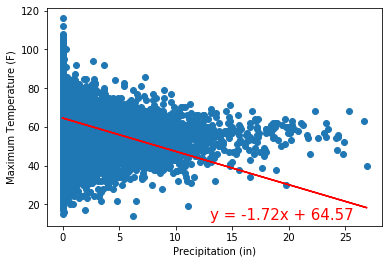

The correlation between both factors is -0.27


In [8]:
# RAIN & MAX TEMP — correlated?
x = corr_df['PRCP']
y = corr_df['TMAX']
plt.xlabel('Precipitation (in)')
plt.ylabel('Maximum Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(13,12),fontsize=15,color="red")
plt.show()


#Pearson correlation coefficient 
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

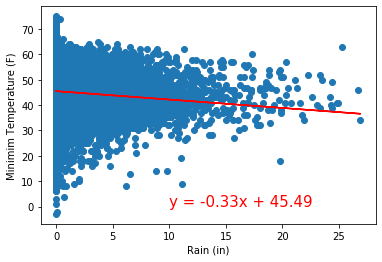

r-squared: 0.005664293462492749
The correlation between both factors is -0.08


In [9]:
# RAIN & MIN TEMP — correlated?
x = corr_df['PRCP']
y = corr_df['TMIN']
plt.xlabel('Rain (in)')
plt.ylabel('Minimim Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.show()
print("r-squared:", rvalue**2)


#Pearson correlation coefficient 
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

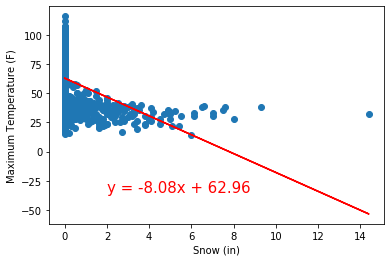

r-squared: 0.017976486287268677
The correlation between both factors is -0.13


In [10]:
# SNOW & MAX TEMP — correlated?
x_sm = corr_df['SNOW']
y_sm = corr_df['TMAX']
plt.xlabel('Snow (in)')
plt.ylabel('Maximum Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_sm, y_sm)
regress_values = x_sm * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_sm,y_sm)
plt.plot(x_sm,regress_values,"r-")
plt.annotate(line_eq,(2,-35),fontsize=15,color="red")
plt.show()
print("r-squared:", rvalue**2)

#Pearson correlation coefficient 
correlation = st.pearsonr(x_sm,y_sm)
print(f"The correlation between both factors is {round(correlation[0],2)}")

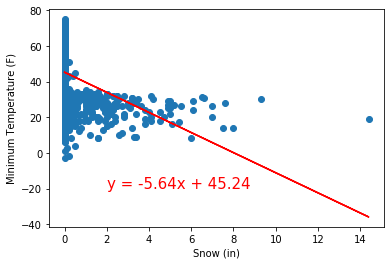

r-squared: 0.018904654748789922
The correlation between both factors is -0.14


In [11]:
# SNOW & MIN TEMP — correlated?
x = corr_df['SNOW']
y = corr_df['TMIN']
plt.xlabel('Snow (in)')
plt.ylabel('Minimum Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(2,-20),fontsize=15,color="red")
plt.show()
print("r-squared:", rvalue**2)

#Pearson correlation coefficient 
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

## Have rain and snow amounts changed over time?  
My hypothesis is we get more rain and less snow.

In [7]:
bins_df = corr_df[['DATE','PRCP','SNOW','TMAX','TMIN',]].copy()


In [8]:
bins_df.count()

DATE    30098
PRCP    30098
SNOW    30098
TMAX    30098
TMIN    30098
dtype: int64

In [9]:
#bins_df['DATE'] = pd.to_datetime(bins_df['DATE'],yearfirst=True)
bins_df['DATE'] = pd.to_datetime(bins_df['DATE'],format='%Y-%m-%d')


In [10]:
bins_df.dtypes

DATE    datetime64[ns]
PRCP           float64
SNOW           float64
TMAX           float64
TMIN           float64
dtype: object

In [11]:
# Create the bins in which Data will be held
   
bins = ['1949-12-31', '1959-12-31', '1969-12-31', '1979-12-31', '1989-12-31', '1999-12-31', '2009-12-31', '2019-12-31']

# Create the names for the five bins
group_names = ["1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]
bins_df["DEC"] = pd.cut(bins_df["DATE"], bins, labels=group_names, include_lowest=True)
bins_df

ValueError: bins must be of datetime64 dtype

In [23]:
bins_df['DATE'] = bins_df['DATE'].dt.tz_localize(None)

In [24]:
bins_df.dtypes

DATE    datetime64[ns]
PRCP           float64
SNOW           float64
TMAX           float64
TMIN           float64
dtype: object

In [12]:
print(pd.__version__)

1.0.3
